In [4]:
# Chances of Recovery

# Age is inversely proportional to Recovery.

# Chances of Recovery = Recovered Count / Death Count * (1 / (Country's Median Age/100))

In [2]:
import pandas as pd
import json
df = pd.read_csv('../covid19/data/median_age.tsv', delimiter="|", header=0)

median_age = {}
for row in df.iterrows():
    v = row[1].values
    median_age[v[1].strip()] =v[2]

max_median_age = max(list(median_age.values()))
print("Max median age: ", max_median_age)
json.dump(median_age, open("../covid19/data/median_age.json", 'w'), indent=2)


Max median age:  55.4


In [3]:
import requests

r = requests.get("https://bing.com/covid/data")
data = json.loads(r.content)

In [4]:
chance_of_recovery = {}

for area in data['areas']:
    try:
        chance_of_recovery[area['displayName']] = {
            "confirmed":area["totalConfirmed"],
            "deaths":area["totalDeaths"],
            "recovered":area["totalRecovered"],
            "median_age":median_age[area['displayName']]
        }
    except :
        print("Not found: ", area['displayName'],  "-----"*24)

Not found:  Réunion ------------------------------------------------------------------------------------------------------------------------
Not found:  Palestinian Authority ------------------------------------------------------------------------------------------------------------------------
Not found:  Mayotte ------------------------------------------------------------------------------------------------------------------------
Not found:  Congo (DRC) ------------------------------------------------------------------------------------------------------------------------
Not found:  Martinique ------------------------------------------------------------------------------------------------------------------------
Not found:  Guadeloupe ------------------------------------------------------------------------------------------------------------------------
Not found:  French Guiana --------------------------------------------------------------------------------------------------------

In [5]:
chance_of_recovery_stats = {}

for country, country_data in chance_of_recovery.items():
    try:
        chance_of_recovery_stats[country] = (country_data['recovered']/country_data['deaths']) * (1/(country_data['median_age']/max_median_age))
    except:
        pass

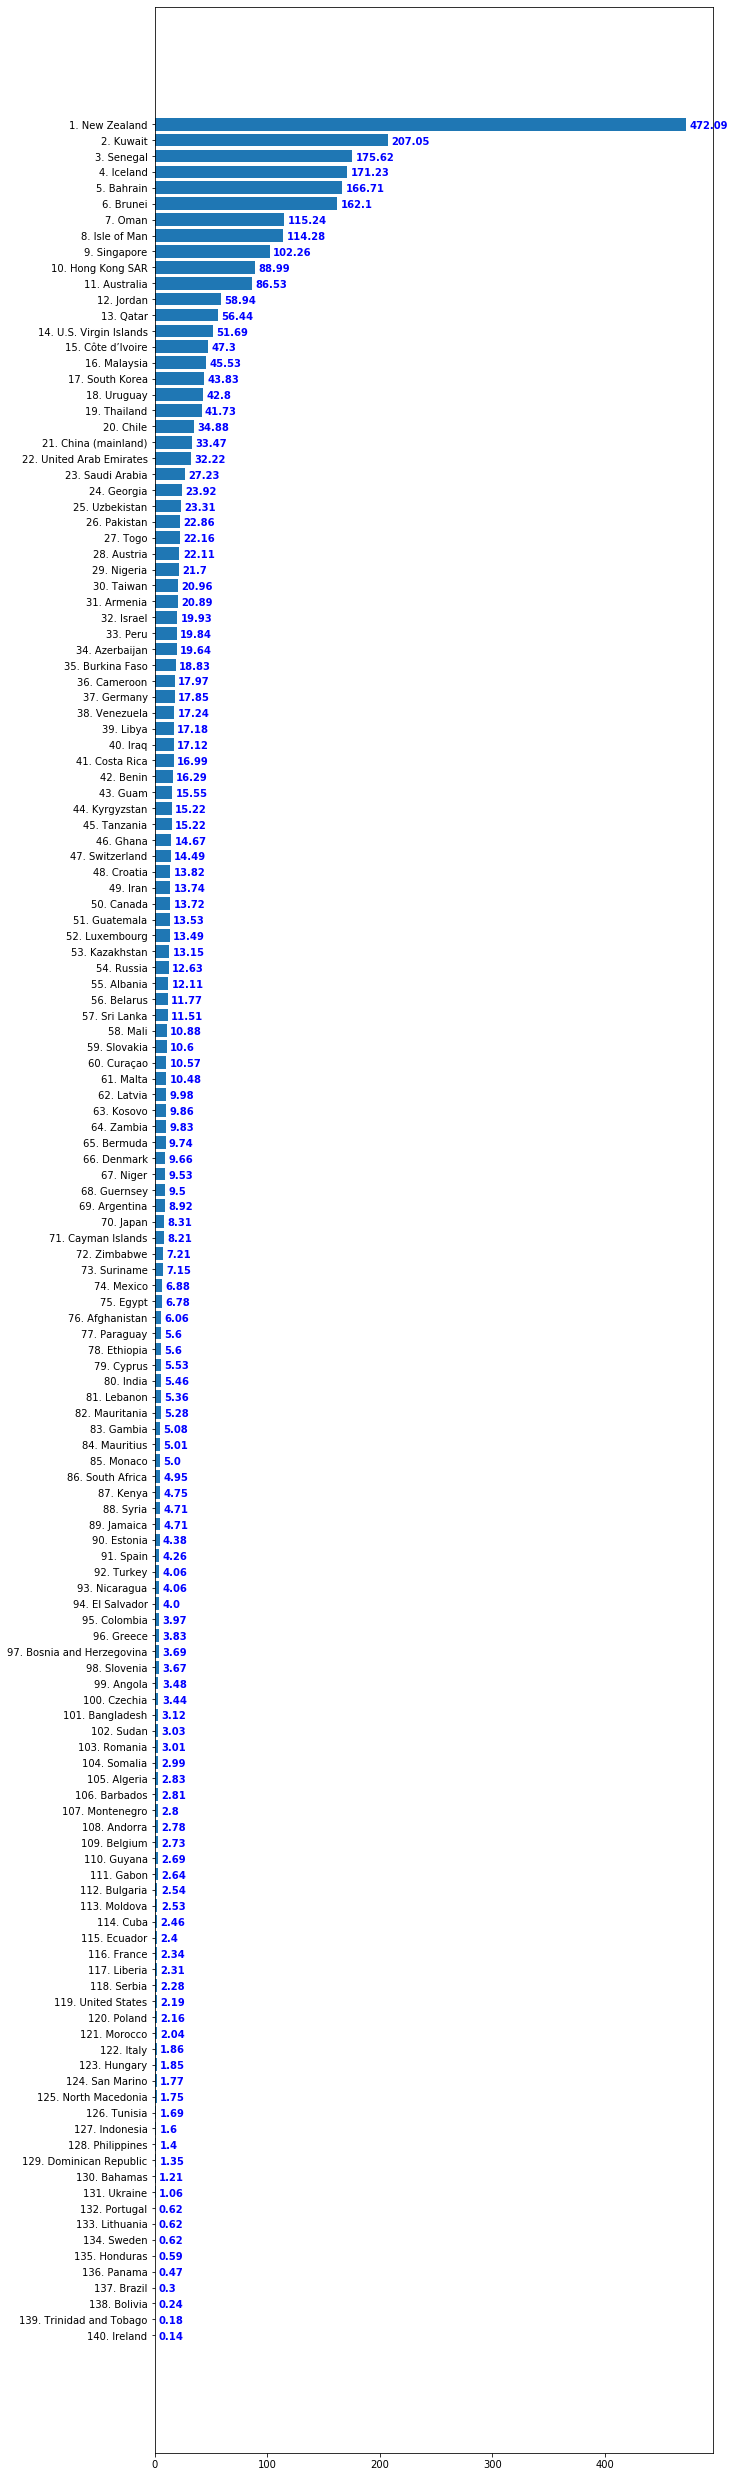

In [15]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import os
chance_of_recovery_stats_sorted = OrderedDict(sorted(chance_of_recovery_stats.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10,45))
x = list(chance_of_recovery_stats_sorted.keys())
x = [f"{e+1}. {i}"for e,i in enumerate(x)][::-1]

y = list(chance_of_recovery_stats_sorted.values())[::-1]
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v + 3, i-0.25, str(round(v,2)), color='blue', fontweight='bold')
    
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')